# TVA

In [1]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.utils import VotingSchemas
from src.outcomes import *
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
import os
import numpy as np

In [2]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

## Input Voting Preference

In [3]:
voting = utils.read_voting(path_voting, table_name="voting5")
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


## Voting Outcomes

In [4]:
outcomes = all_schemas_outcomes(voting)
outcomes_df = all_schemas_outcomes_to_pandas(outcomes)
outcomes_df

,A,B,C,D,Winner
Plurality Voting,1,2,3,0,C
Voting for Two,3,2,3,4,D
Veto Voting,4,4,4,6,D
Borda Voting,8,8,10,10,C


## Happiness Level

### Plurality Voting

Voters Happiness Level


,Happiness Level
voter_0,1.000000
voter_1,0.410487
voter_2,1.000000
voter_3,1.000000
voter_4,0.000000
voter_5,0.000000



Overall Happiness Level: 3.410486590766719

Happiness Level Distribution


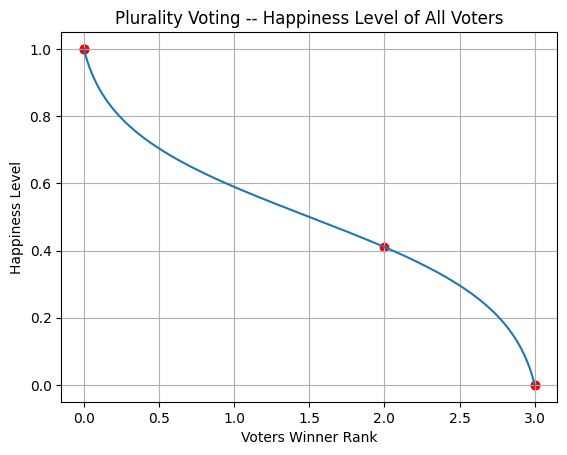


Histogram of Happiness Level


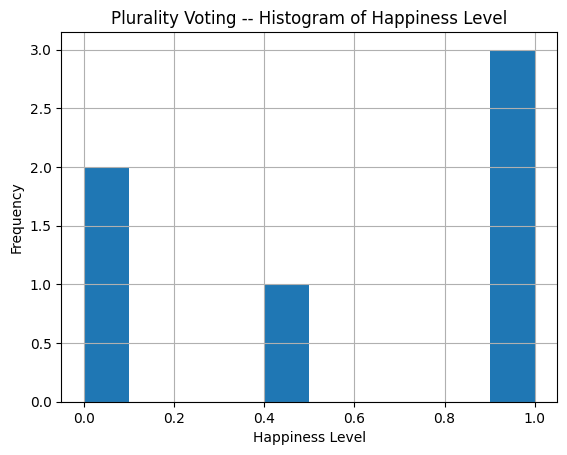

In [5]:
pv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.PLURALITY_VOTING.value].winner,
    VotingSchemas.PLURALITY_VOTING,
).run(show=True)

### Voting for Two

Voters Happiness Level


,Happiness Level
voter_0,0.410487
voter_1,0.589513
voter_2,0.589513
voter_3,0.589513
voter_4,0.410487
voter_5,0.589513



Overall Happiness Level: 3.1790268184665624

Happiness Level Distribution


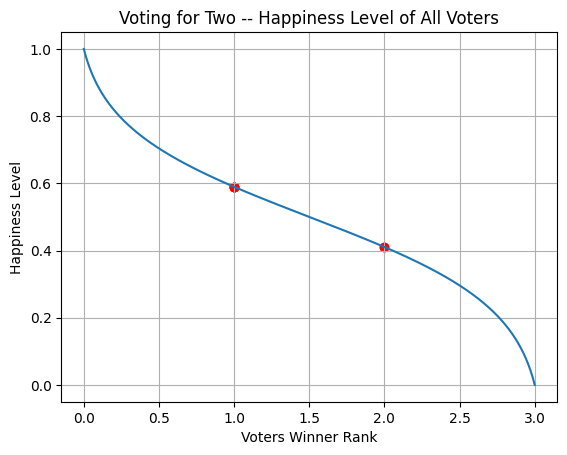


Histogram of Happiness Level


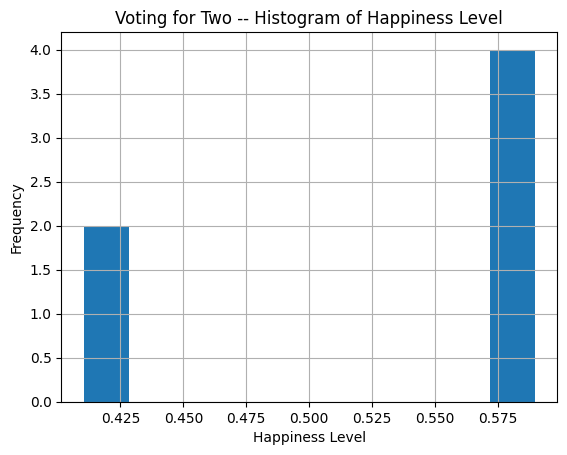

In [6]:
vt_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VOTING_FOR_TWO.value].winner,
    VotingSchemas.VOTING_FOR_TWO,
).run(show=True)

### Veto Voting

Voters Happiness Level


,Happiness Level
voter_0,0.410487
voter_1,0.589513
voter_2,0.589513
voter_3,0.589513
voter_4,0.410487
voter_5,0.589513



Overall Happiness Level: 3.1790268184665624

Happiness Level Distribution


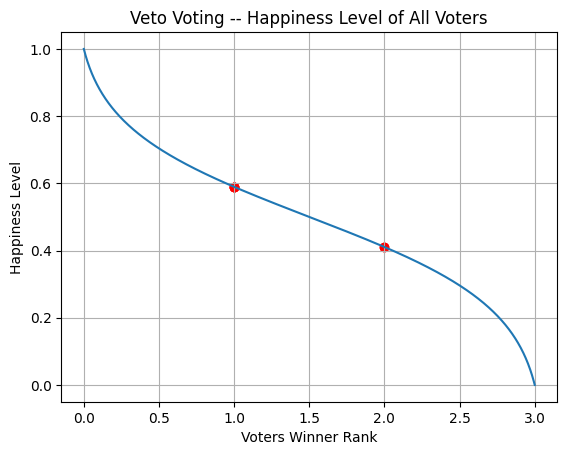


Histogram of Happiness Level


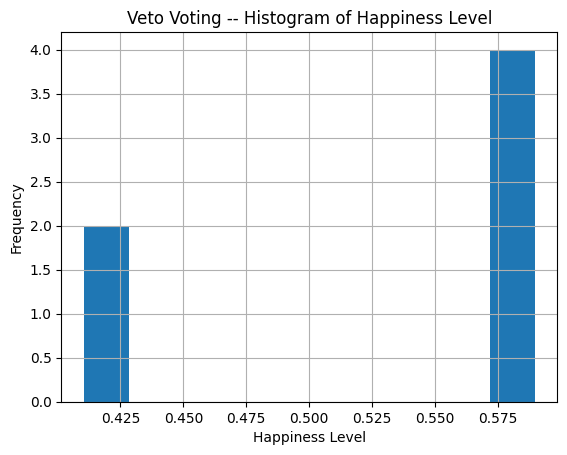

In [7]:
vv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VETO_VOTING.value].winner,
    VotingSchemas.VETO_VOTING,
).run(show=True)

### Borda Voting

Voters Happiness Level


,Happiness Level
voter_0,1.000000
voter_1,0.410487
voter_2,1.000000
voter_3,1.000000
voter_4,0.000000
voter_5,0.000000



Overall Happiness Level: 3.410486590766719

Happiness Level Distribution


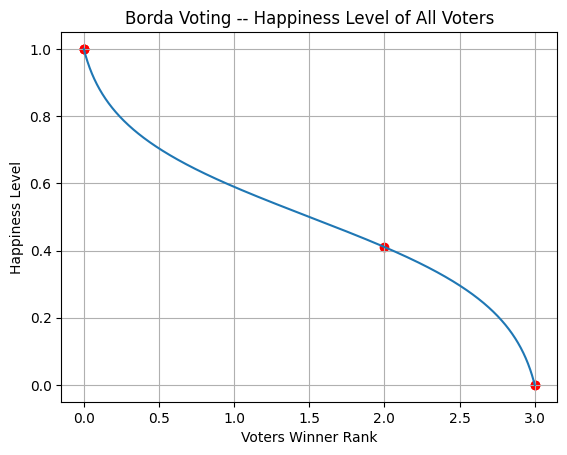


Histogram of Happiness Level


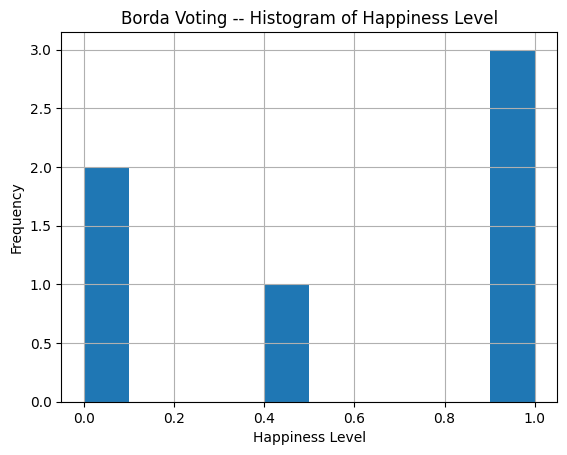

In [8]:
bv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.BORDA_VOTING.value].winner,
    VotingSchemas.BORDA_VOTING,
).run(show=True)

## Strategic Voting

### Plurality Voting

In [9]:
pv_s = StrategicVoting(voting, pv_h, plurality_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487
1,5,"[B, D, A, C]",B,0.410487,0.0,2.820973,3.410487


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487


Risk: 0.13682886358890622


### Voting for Two

In [10]:
vt_s = StrategicVoting(voting, vt_h, for_two_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[A, B, D, C]",A,1.0,0.589513,2.589513,3.179027
1,5,"[A, B, C, D]",A,1.0,0.589513,2.589513,3.179027
2,5,"[B, A, D, C]",A,1.0,0.589513,2.589513,3.179027
3,5,"[B, A, C, D]",A,1.0,0.589513,2.589513,3.179027


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[A, B, D, C]",A,1.0,0.589513,2.589513,3.179027


Risk: 0.06841443179445311


### Veto Voting

In [11]:
vv_s = StrategicVoting(voting, vv_h, veto_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H


Risk: 0.0


### Borda Voting

In [12]:
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


In [13]:
outcomes_df

,A,B,C,D,Winner
Plurality Voting,1,2,3,0,C
Voting for Two,3,2,3,4,D
Veto Voting,4,4,4,6,D
Borda Voting,8,8,10,10,C


In [14]:
bv_s = StrategicVoting(voting, bv_h, borda_outcome).run(show=True)

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,1,"[B, D, A, C]",D,0.589513,0.410487,3.179027,3.410487
1,1,"[D, B, C, A]",D,0.589513,0.410487,3.179027,3.410487
2,1,"[D, B, A, C]",D,0.589513,0.410487,3.179027,3.410487
3,1,"[D, A, B, C]",D,0.589513,0.410487,3.179027,3.410487
4,1,"[D, A, C, B]",D,0.589513,0.410487,3.179027,3.410487
5,4,"[B, D, A, C]",D,0.410487,0.000000,3.179027,3.410487
6,4,"[A, D, B, C]",D,0.410487,0.000000,3.179027,3.410487
7,4,"[D, B, A, C]",D,0.410487,0.000000,3.179027,3.410487
8,4,"[D, A, B, C]",D,0.410487,0.000000,3.179027,3.410487
9,5,"[D, A, B, C]",D,0.589513,0.000000,3.179027,3.410487


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,1,"[B, D, A, C]",D,0.589513,0.410487,3.179027,3.410487
9,5,"[D, A, B, C]",D,0.589513,0.000000,3.179027,3.410487
5,4,"[B, D, A, C]",D,0.410487,0.000000,3.179027,3.410487


Risk: 0.39300893948885424
